In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-olympiad-sustainable-urban-living/sample_submission.csv
/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv
/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv


In [2]:
df_house = pd.read_csv("/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv")

In [3]:
print(df_house.describe())

       Property_Area  Number_of_Windows  Number_of_Doors  \
count   31599.000000       30266.000000     31599.000000   
mean     1392.563784           3.926254         2.333745   
std      1950.693832           2.694485         1.178326   
min       100.000000           0.000000         1.000000   
25%       495.000000           2.000000         1.000000   
50%       932.000000           4.000000         2.000000   
75%      1767.000000           5.000000         3.000000   
max     28064.000000          15.000000         6.000000   

       Frequency_of_Powercuts  Traffic_Density_Score  Air_Quality_Index  \
count            30490.000000           31599.000000       31599.000000   
mean                 0.486684               6.356843         121.378588   
std                  0.755209               1.219395          62.071787   
min                  0.000000               0.000000           0.000000   
25%                  0.000000               5.610000          95.000000   
50%      

# Handeling Missing Values

In [4]:
#First identify numerical and categorical columns

# Identify numeric and categorical columns
numeric_columns = df_house.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df_house.select_dtypes(include=['object', 'category']).columns.tolist()

print(len(numeric_columns))
print(len(categorical_columns))

8
7


In [5]:
for col in numeric_columns:
    df_house.fillna({col: df_house[col].median()}, inplace=True)

# Fill missing values for categorical columns with mode
for col in categorical_columns:
    df_house.fillna({col: df_house[col].mode()[0]}, inplace=True)

In [6]:
df_house.head(20)
print(df_house.isnull().sum())
#All the nan values have been replaced by median and mode

Id                        0
Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64


# **Encoding**

In [7]:
  #Ebcoding categorical variables to numerical
   # Property_Type
   # Furnishing
   # Power_Backup
   # Water_Supply
   # Crime_Rate
   # Dust_and_Noise
    

In [8]:
#Property_Type- Lable encoding  1,2,3,4,5,6
unique_values_1 = df_house['Property_Type'].unique()
print(unique_values_1)

# Mapping dictionary
mapping = {"Apartment": 1, "Bungalow": 2,"Single-family home": 3, "Duplex": 4, "#R%$G&867":5, "Container Home": 6}

df_house["Property_Type"] = df_house["Property_Type"].map(mapping)


df_house.rename(columns={"Property_Type": "Property_Type"}, inplace=True)

print(df_house["Property_Type"])

['Apartment' 'Bungalow' 'Single-family home' 'Duplex' '#R%$G&867'
 'Container Home']
0        1
1        1
2        1
3        1
4        2
        ..
31594    1
31595    6
31596    4
31597    1
31598    3
Name: Property_Type, Length: 31599, dtype: int64


In [9]:
# Furnishing- ordinal encoding 
#Semi_Furnished -1
#Unfurnished-2
#Fully Furnished-3
unique_values_2=df_house['Furnishing'].unique()
print(unique_values_2)

# Mapping dictionary
mapping = {"Semi_Furnished": 1, "Unfurnished": 2,"Fully Furnished": 3 }

df_house["Furnishing"] = df_house["Furnishing"].map(mapping)


df_house.rename(columns={"Furnishing": "Furnishing"}, inplace=True)

print(df_house["Furnishing"])

['Semi_Furnished' 'Unfurnished' 'Fully Furnished']
0        1
1        2
2        3
3        2
4        3
        ..
31594    1
31595    3
31596    1
31597    1
31598    1
Name: Furnishing, Length: 31599, dtype: int64


In [10]:
 # Power_Backup-One hot encoder
unique_values_3=df_house['Power_Backup'].unique()
print(unique_values_3)



['No' 'Yes' 'NOT MENTIONED']


In [11]:
one_hot_encoded = pd.get_dummies(df_house['Power_Backup'])

 #Concatenate the one-hot encoded columns with the original DataFrame
df_house = pd.concat([df_house.drop('Power_Backup', axis=1), one_hot_encoded], axis=1)

print(df_house.head())

       Id  Property_Type  Property_Area  Number_of_Windows  Number_of_Doors  \
0  0x21e3              1            106                4.0                1   
1  0x68d4              1            733                2.0                2   
2  0x7d81              1            737                4.0                2   
3  0x7a57              1            900                3.0                2   
4  0x9409              2           2238               14.0                6   

   Furnishing  Frequency_of_Powercuts             Water_Supply  \
0           1                     0.0  Once in a day - Morning   
1           2                     1.0  Once in a day - Evening   
2           3                     0.0  Once in a day - Morning   
3           2                     2.0  Once in a day - Morning   
4           3                     0.0                 All time   

   Traffic_Density_Score              Crime_Rate Dust_and_Noise  \
0                   5.89  Slightly below average         Medi

In [12]:
# Water_Supply- lable encoding
#Once in a day - Morning  -1
#Once in a day - Evening  -2
#All time- 3
#NOT MENTIONED -0
#Once in two days -4
unique_values_4=df_house['Water_Supply'].unique()
print(unique_values_4)

# Mapping dictionary
mapping = {"Once in a day - Morning": 1, "Once in a day - Evening": 2,"All time": 3, "Once in two days": 4, "NOT MENTIONED":0 }

df_house["Water_Supply"] = df_house["Water_Supply"].map(mapping)


df_house.rename(columns={"Water_Supply": "Water_Supply"}, inplace=True)

print(df_house["Water_Supply"])

['Once in a day - Morning' 'Once in a day - Evening' 'All time'
 'NOT MENTIONED' 'Once in two days']
0        1
1        2
2        1
3        1
4        3
        ..
31594    3
31595    1
31596    4
31597    1
31598    2
Name: Water_Supply, Length: 31599, dtype: int64


In [13]:
# Crime_Rate- Ordinal encoding 
#Slightly below average-1
#Well below average-2
#Well above average-3
#Slightly above average-4
unique_values_6=df_house['Crime_Rate'].unique()
print(unique_values_6)

# Mapping dictionary
mapping = {"Slightly below average": 1, "Well below average": 2,"Well above average": 3, "Slightly above average": 4 }

df_house["Crime_Rate"] = df_house["Crime_Rate"].map(mapping)


df_house.rename(columns={"Crime_Rate": "Crime_Rate"}, inplace=True)

print(df_house["Crime_Rate"])

['Slightly below average' 'Well below average' 'Well above average'
 'Slightly above average']
0        1
1        2
2        1
3        3
4        2
        ..
31594    2
31595    2
31596    2
31597    2
31598    2
Name: Crime_Rate, Length: 31599, dtype: int64


In [14]:
# Dust_and_Noise- Ordinal encoding
#  'Low''Medium' 'High' = 1,2,3
unique_values_7=df_house['Dust_and_Noise'].unique()
print(unique_values_7)

# Mapping dictionary
mapping = {"Low": 1, "Medium": 2,"High": 3 }

df_house["Dust_and_Noise"] = df_house["Dust_and_Noise"].map(mapping)


df_house.rename(columns={"Dust_and_Noise": "Dust_and_Noise"}, inplace=True)

print(df_house["Dust_and_Noise"])

['Medium' 'High' 'Low']
0        2
1        2
2        2
3        2
4        2
        ..
31594    2
31595    2
31596    2
31597    2
31598    2
Name: Dust_and_Noise, Length: 31599, dtype: int64


In [15]:
#Dataframe after doing feature encoding and filling missing values
print(df_house.head(20))

        Id  Property_Type  Property_Area  Number_of_Windows  Number_of_Doors  \
0   0x21e3              1            106                4.0                1   
1   0x68d4              1            733                2.0                2   
2   0x7d81              1            737                4.0                2   
3   0x7a57              1            900                3.0                2   
4   0x9409              2           2238               14.0                6   
5   0xbe4e              3           1185                3.0                3   
6    0xe2a              3           1779                3.0                3   
7   0x2ea5              4           1281                5.0                2   
8   0x7a83              1            268                1.0                3   
9   0xb0fb              1            159                2.0                2   
10  0xaf2f              1            521                1.0                2   
11  0x6ffb              2           2164

# Correlation

In [16]:
#def hex_to_decimal(hex_value):
#    return int(hex_value, 16)

# Apply the function to the column containing hexadecimal values
#df_house['decimal_ID'] = df_house['Id'].apply(hex_to_decimal)

In [17]:
print(df_house.head())

       Id  Property_Type  Property_Area  Number_of_Windows  Number_of_Doors  \
0  0x21e3              1            106                4.0                1   
1  0x68d4              1            733                2.0                2   
2  0x7d81              1            737                4.0                2   
3  0x7a57              1            900                3.0                2   
4  0x9409              2           2238               14.0                6   

   Furnishing  Frequency_of_Powercuts  Water_Supply  Traffic_Density_Score  \
0           1                     0.0             1                   5.89   
1           2                     1.0             2                   4.37   
2           3                     0.0             1                   7.45   
3           2                     2.0             1                   6.16   
4           3                     0.0             3                   5.46   

   Crime_Rate  Dust_and_Noise  Air_Quality_Index  Neighb

In [18]:
# Drop the feature to ignore from the DataFrame
df_house_new = df_house.drop('Id', axis=1)

# Calculate the correlation matrix for the subset of features
correlation_matrix = df_house_new.corr()

# Print or use the correlation matrix as needed
print("Correlation Matrix (ignoring feature_to_ignore):")
print(correlation_matrix)

Correlation Matrix (ignoring feature_to_ignore):
                        Property_Type  Property_Area  Number_of_Windows  \
Property_Type                1.000000       0.023263           0.037676   
Property_Area                0.023263       1.000000           0.259347   
Number_of_Windows            0.037676       0.259347           1.000000   
Number_of_Doors             -0.096447       0.217901           0.389537   
Furnishing                   0.001839       0.006356           0.008621   
Frequency_of_Powercuts       0.003515      -0.000303          -0.007482   
Water_Supply                 0.004789       0.004221           0.006133   
Traffic_Density_Score       -0.001353       0.003493           0.000010   
Crime_Rate                   0.000931      -0.014801          -0.002107   
Dust_and_Noise              -0.003657       0.006826          -0.001877   
Air_Quality_Index           -0.003446       0.000174           0.002666   
Neighborhood_Review          0.003816       0.01442

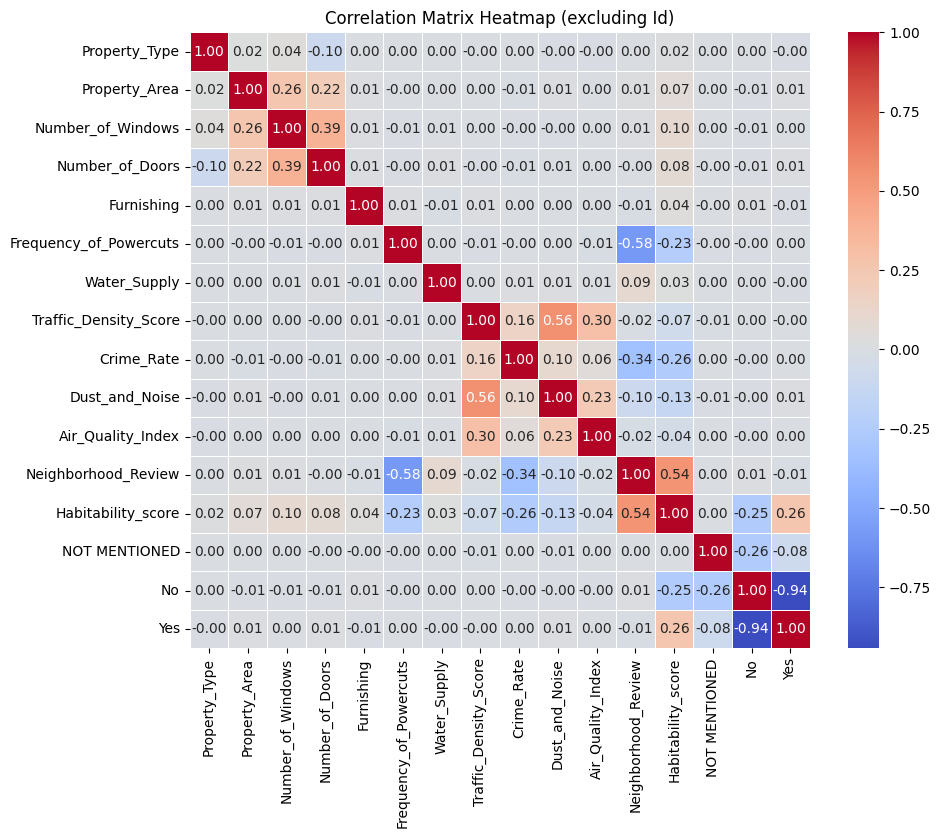

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (excluding Id)')
plt.show()

In [20]:
df_house_new['Property_Area'].dtype

dtype('int64')

# Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame containing all features

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the entire dataset
scaled_data = scaler.fit_transform(df_house_new)

# Convert the scaled data back to a DataFrame (optional)
df_house_scaled = pd.DataFrame(scaled_data, columns=df_house_new.columns)

In [22]:
print(df_house_scaled.head())

   Property_Type  Property_Area  Number_of_Windows  Number_of_Doors  \
0            0.0       0.000215           0.266667              0.0   
1            0.0       0.022636           0.133333              0.2   
2            0.0       0.022779           0.266667              0.2   
3            0.0       0.028608           0.200000              0.2   
4            0.2       0.076455           0.933333              1.0   

   Furnishing  Frequency_of_Powercuts  Water_Supply  Traffic_Density_Score  \
0         0.0                0.000000          0.25               0.594349   
1         0.5                0.333333          0.50               0.440969   
2         1.0                0.000000          0.25               0.751766   
3         0.5                0.666667          0.25               0.621594   
4         1.0                0.000000          0.75               0.550959   

   Crime_Rate  Dust_and_Noise  Air_Quality_Index  Neighborhood_Review  \
0    0.000000             0.5  

# Regression 

In [23]:
df_house_scaled.head(20)
print(df_house.isnull().sum())
#All the nan values have been replaced by median and mode


Id                        0
Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
NOT MENTIONED             0
No                        0
Yes                       0
dtype: int64


In [24]:
from sklearn.model_selection import train_test_split


X_train = df_house_scaled.drop('Habitability_score', axis=1)  # Exclude the target column

# Select the target variable for y_train
y_train = df_house_scaled['Habitability_score']  # Select only the target column

# Split the original training data into a new training set and a validation set
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

 

In [25]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_new, y_train_new)

LinearRegression()

In [26]:
#X_test =test_data.drop('Habitability_score', axis=1)  # Exclude the target column

# Select the target variable for y_train
#y_test =test_data['Habitability_score']  # Select only the target column

from sklearn.metrics import mean_squared_error, r2_score
# Model Evaluation
y_pred = model.predict(X_val)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.013680297709642287
R-squared: 0.38149865994090304


# ****TESTING

In [27]:
test_dataframe = pd.read_csv("/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv")

In [28]:
# Identify numeric and categorical columns
numeric_columns = test_dataframe.select_dtypes(include=['number']).columns.tolist()
categorical_columns = test_dataframe.select_dtypes(include=['object', 'category']).columns.tolist()

print(len(numeric_columns))
print(len(categorical_columns))

7
7


In [29]:
test_dataframe.head

<bound method NDFrame.head of           Id       Property_Type  Property_Area  Number_of_Windows  \
0     0x6808  Single-family home           1521                5.0   
1     0x6a98  Single-family home           2233                2.0   
2     0xacc0           Apartment            986                1.0   
3     0x8225  Single-family home           1625                2.0   
4     0xaee8  Single-family home           1166                2.0   
...      ...                 ...            ...                ...   
7895  0x6e26  Single-family home           1120                3.0   
7896  0xa013           Apartment            445                1.0   
7897  0x9721            Bungalow           3780                6.0   
7898  0x7e25  Single-family home           1266                3.0   
7899  0x8cb4  Single-family home           1229                2.0   

      Number_of_Doors       Furnishing  Frequency_of_Powercuts Power_Backup  \
0                   1      Unfurnished            

In [30]:
for col in numeric_columns:
    test_dataframe.fillna({col:test_dataframe[col].median()}, inplace=True)

# Fill missing values for categorical columns with mode
for col in categorical_columns:
    test_dataframe.fillna({col:test_dataframe[col].mode()[0]}, inplace=True)

In [31]:
#Property_Type- Lable encoding  1,2,3,4,5,6
unique_values_1 = test_dataframe['Property_Type'].unique()
print(unique_values_1)

# Mapping dictionary
mapping = {"Apartment": 1, "Bungalow": 2,"Single-family home": 3, "Duplex": 4, "#R%$G&867":5, "Container Home": 6}

test_dataframe["Property_Type"] = test_dataframe["Property_Type"].map(mapping)


test_dataframe.rename(columns={"Property_Type": "Property_Type"}, inplace=True)

print(test_dataframe["Property_Type"])



['Single-family home' 'Apartment' 'Bungalow' 'Container Home' 'Duplex'
 '#R%$G&867']
0       3
1       3
2       1
3       3
4       3
       ..
7895    3
7896    1
7897    2
7898    3
7899    3
Name: Property_Type, Length: 7900, dtype: int64


In [32]:
# Furnishing- ordinal encoding 
#Semi_Furnished -1
#Unfurnished-2
#Fully Furnished-3
unique_values_2=test_dataframe['Furnishing'].unique()
print(unique_values_2)

# Mapping dictionary
mapping = {"Semi_Furnished": 1, "Unfurnished": 2,"Fully Furnished": 3 }

test_dataframe["Furnishing"] = test_dataframe["Furnishing"].map(mapping)


test_dataframe.rename(columns={"Furnishing": "Furnishing"}, inplace=True)

print(test_dataframe["Furnishing"])

['Unfurnished' 'Semi_Furnished' 'Fully Furnished']
0       2
1       1
2       2
3       1
4       3
       ..
7895    1
7896    3
7897    2
7898    1
7899    3
Name: Furnishing, Length: 7900, dtype: int64


In [33]:
# Power_Backup-One hot encoder
unique_values_3=test_dataframe['Power_Backup'].unique()
print(unique_values_3)


['No' 'Yes' 'NOT MENTIONED']


In [34]:
one_hot_encoded = pd.get_dummies(test_dataframe['Power_Backup'])

 #Concatenate the one-hot encoded columns with the original DataFrame
test_dataframe = pd.concat([test_dataframe.drop('Power_Backup', axis=1), one_hot_encoded], axis=1)

print(test_dataframe.head())

       Id  Property_Type  Property_Area  Number_of_Windows  Number_of_Doors  \
0  0x6808              3           1521                5.0                1   
1  0x6a98              3           2233                2.0                1   
2  0xacc0              1            986                1.0                1   
3  0x8225              3           1625                2.0                1   
4  0xaee8              3           1166                2.0                2   

   Furnishing  Frequency_of_Powercuts             Water_Supply  \
0           2                     0.0                 All time   
1           1                     0.0  Once in a day - Morning   
2           2                     0.0                 All time   
3           1                     0.0  Once in a day - Evening   
4           3                     0.0  Once in a day - Evening   

   Traffic_Density_Score              Crime_Rate Dust_and_Noise  \
0                   7.61      Well below average         Medi

In [35]:
# Water_Supply- lable encoding
#Once in a day - Morning  -1
#Once in a day - Evening  -2
#All time- 3
#NOT MENTIONED -0
#Once in two days -4
unique_values_4=test_dataframe['Water_Supply'].unique()
print(unique_values_4)

# Mapping dictionary
mapping = {"Once in a day - Morning": 1, "Once in a day - Evening": 2,"All time": 3, "Once in two days": 4, "NOT MENTIONED":0 }

test_dataframe["Water_Supply"] = test_dataframe["Water_Supply"].map(mapping)


test_dataframe.rename(columns={"Water_Supply": "Water_Supply"}, inplace=True)

print(test_dataframe["Water_Supply"])

['All time' 'Once in a day - Morning' 'Once in a day - Evening'
 'Once in two days' 'NOT MENTIONED']
0       3
1       1
2       3
3       2
4       2
       ..
7895    3
7896    3
7897    4
7898    1
7899    3
Name: Water_Supply, Length: 7900, dtype: int64


In [36]:
# Crime_Rate- Ordinal encoding 
#Slightly below average-1
#Well below average-2
#Well above average-3
#Slightly above average-4
unique_values_6=test_dataframe['Crime_Rate'].unique()
print(unique_values_6)

# Mapping dictionary
mapping = {"Slightly below average": 1, "Well below average": 2,"Well above average": 3, "Slightly above average": 4 }

test_dataframe["Crime_Rate"] = test_dataframe["Crime_Rate"].map(mapping)


test_dataframe.rename(columns={"Crime_Rate": "Crime_Rate"}, inplace=True)

print(test_dataframe["Crime_Rate"])

['Well below average' 'Slightly below average' 'Slightly above average'
 'Well above average']
0       2
1       2
2       2
3       2
4       1
       ..
7895    4
7896    4
7897    2
7898    4
7899    2
Name: Crime_Rate, Length: 7900, dtype: int64


In [37]:
# Dust_and_Noise- Ordinal encoding
#  'Low''Medium' 'High' = 1,2,3
unique_values_7=test_dataframe['Dust_and_Noise'].unique()
print(unique_values_7)

# Mapping dictionary
mapping = {"Low": 1, "Medium": 2,"High": 3 }

test_dataframe["Dust_and_Noise"] = test_dataframe["Dust_and_Noise"].map(mapping)


test_dataframe.rename(columns={"Dust_and_Noise": "Dust_and_Noise"}, inplace=True)

print(test_dataframe["Dust_and_Noise"])

['Medium' 'Low' 'High']
0       2
1       2
2       2
3       2
4       2
       ..
7895    2
7896    2
7897    2
7898    2
7899    3
Name: Dust_and_Noise, Length: 7900, dtype: int64


In [38]:
# Identify numeric and categorical columns
numeric_columns = test_dataframe.select_dtypes(include=['number']).columns.tolist()
categorical_columns = test_dataframe.select_dtypes(include=['object', 'category']).columns.tolist()

print(len(numeric_columns))
print(len(categorical_columns))

print(categorical_columns)

12
1
['Id']


In [39]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame containing all features

test_dataframe_new = test_dataframe.drop('Id', axis=1)
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the entire dataset
scaled_data = scaler.fit_transform(test_dataframe_new)

# Convert the scaled data back to a DataFrame (optional)
test_scaled = pd.DataFrame(scaled_data, columns=test_dataframe_new.columns)

In [40]:
test_scaled.head(20)
print(test_scaled.isnull().sum())
#All the nan values have been replaced by median and mode


Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
NOT MENTIONED             0
No                        0
Yes                       0
dtype: int64


In [41]:
X_test=test_scaled
y_pred_new = model.predict(X_test)

In [42]:
test_dataframe['Habitability_score'] = y_pred_new



test_dataframe.head()

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,NOT MENTIONED,No,Yes,Habitability_score
0,0x6808,3,1521,5.0,1,2,0.0,3,7.61,2,2,156.0,4.71,False,True,False,0.787674
1,0x6a98,3,2233,2.0,1,1,0.0,1,5.28,2,2,82.0,4.50,False,True,False,0.761416
2,0xacc0,1,986,1.0,1,2,0.0,3,7.72,2,2,91.0,4.79,False,True,False,0.777402
3,0x8225,3,1625,2.0,1,1,0.0,2,6.19,2,2,159.0,4.09,False,True,False,0.708584
4,0xaee8,3,1166,2.0,2,3,0.0,2,5.84,1,2,82.0,3.56,False,True,False,0.684994


In [43]:
new_df=test_dataframe[['Id','Habitability_score']]

print(new_df)

new_df.to_csv('new_dataframe.csv', index=False)

          Id  Habitability_score
0     0x6808            0.787674
1     0x6a98            0.761416
2     0xacc0            0.777402
3     0x8225            0.708584
4     0xaee8            0.684994
...      ...                 ...
7895  0x6e26            0.642812
7896  0xa013            0.607286
7897  0x9721            0.824725
7898  0x7e25            0.613887
7899  0x8cb4            0.770461

[7900 rows x 2 columns]
